# MRS spectral band overlap

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
# import modules
import funcs

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
bands = ["1A", "1B", "1C", "2A", "2B", "2C", "3A", "3B", "3C", "4A", "4B", "4C"]

In [3]:
# Define paths to data
workDir       = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir        = workDir+'cdp_data/'
d2cMapDir     = workDir+'notebooks/distortionMaps/'

# Populate dictionaries with the wavelength, pixel size and validity maps 
# (corresponding to the detector plane)

lambdaMap = {}
xpos      = {}

for band in bands:
    d2cMaps         = funcs.load_obj('d2cMaps_band{}_tr10pc'.format(band),path=d2cMapDir)
    lambdaMap[band] = d2cMaps['lambdaMap']
    ypos,xpos[band] = funcs.detpixel_trace(band,d2cMaps,sliceID=d2cMaps['nslices']/2,alpha_pos=0.)

<IPython.core.display.Javascript object>


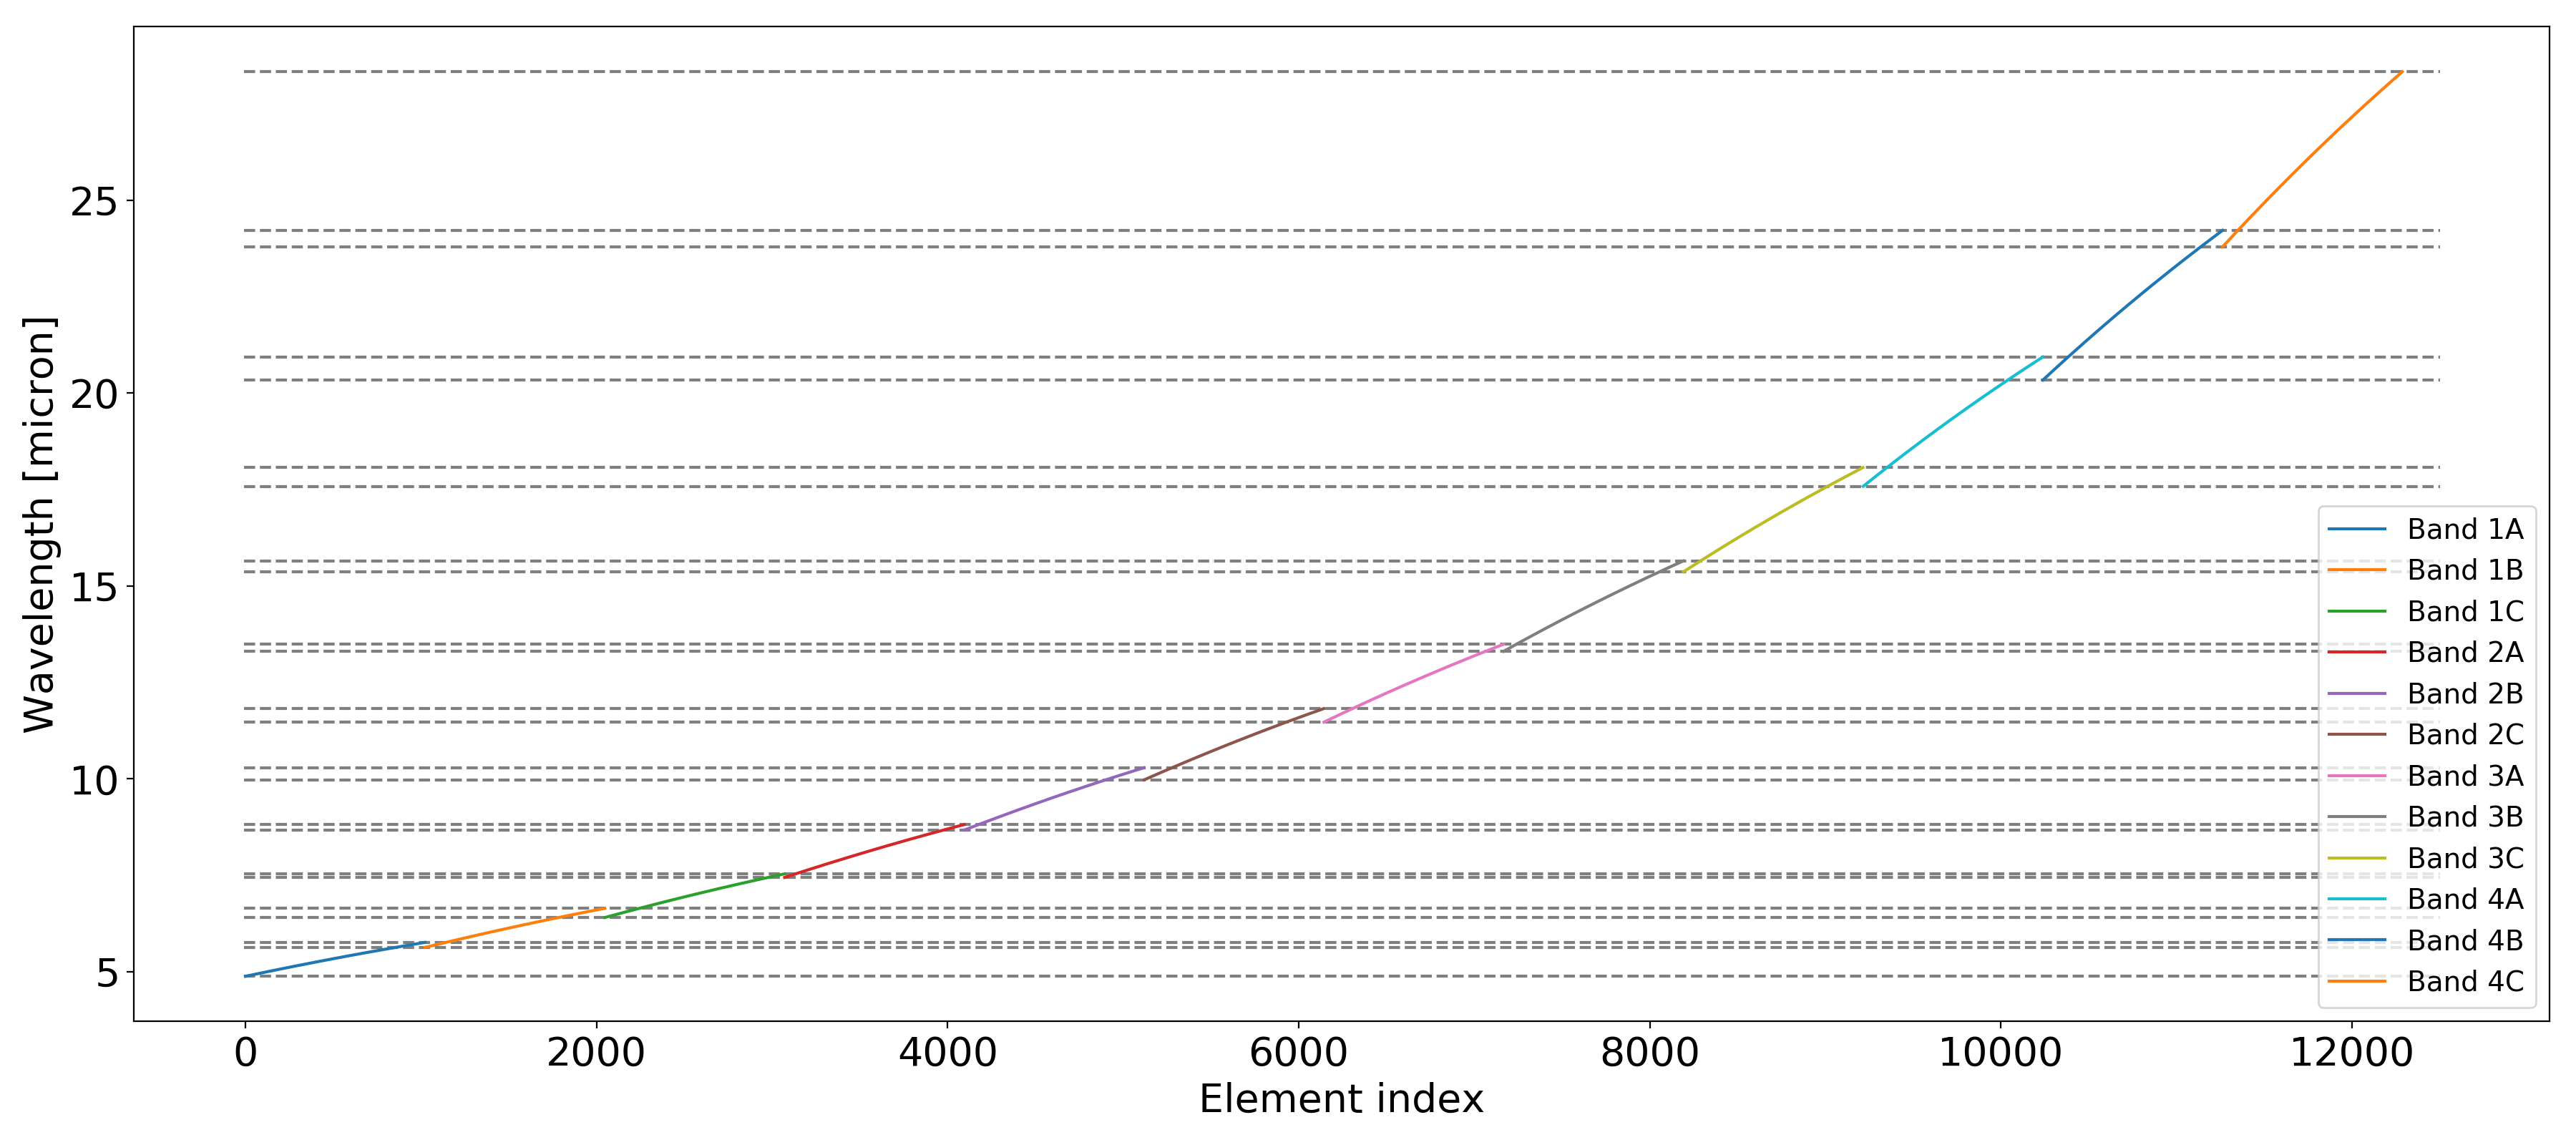

In [4]:
plt.figure(figsize=(18,8))
counter = -1
for band in ["1A", "1B", "1C", "2A", "2B", "2C", "3A", "3B", "3C", "4A", "4B", "4C"]:
    counter+=1
    if band[0] in ['1','2']:
        plt.plot(counter*1024 + np.arange(1024),lambdaMap[band][ypos,xpos[band]],label='Band {}'.format(band))
    elif band[0] in ['3','4']:
        plt.plot(counter*1024 + np.arange(1024),np.flipud(lambdaMap[band][ypos,xpos[band]]),label='Band {}'.format(band))
    plt.hlines([lambdaMap[band][ypos,xpos[band]][0],lambdaMap[band][ypos,xpos[band]][-1]],-10,12500,'k',linestyle='dashed',alpha=0.5)
plt.xlabel('Element index')
plt.ylabel('Wavelength [micron]')
plt.legend(loc='lower right')
plt.tight_layout()